<a href="https://colab.research.google.com/github/nandhiniswaminathan/face-recognition/blob/master/neural_network_wine_classification_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

print("there you go")

there you go


Inputting data

In [0]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')

# Read in red wine data 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

#print("dumb man")

dumb man


Data Exploration

In [0]:
red.info()
white.describe()
red.isnull()

Data Visualisation

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor='red', alpha=0.5, label="Red wine")
ax[1].hist(white.alcohol, 10, facecolor='grey', ec="black", lw=0.5, alpha=0.5, label="White wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol for red")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Alcohol in % Vol for white")
ax[1].set_ylabel("Frequency")
#ax[0].legend(loc='best')
#ax[1].legend(loc='best')
fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

Histograms.
Cuz why not?

In [0]:
import numpy as np
print(np.histogram(red.alcohol, bins=[7,8,9,10,11,12,13,14,15]))
print(np.histogram(white.alcohol, bins=[7,8,9,10,11,12,13,14,15]))

(array([  0,   7, 673, 452, 305, 133,  21,   8]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))
(array([   0,  317, 1606, 1256,  906,  675,  131,    7]), array([ 7,  8,  9, 10, 11, 12, 13, 14, 15]))


We also understand through further data exploration and visualisaton that sulfates are a determining factor


Sulfates

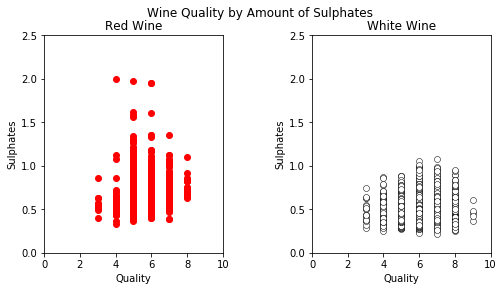

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(red['quality'], red["sulphates"], color="red")
ax[1].scatter(white['quality'], white['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Acidity



 The colors in this image are randomly chosen with the help of the NumPy random module. You can always change this by passing a list to the redcolors or whitecolors variables. Make sure that they are the same (except for 1 because the white wine data has one unique quality value more than the red wine data), though, otherwise your legends are not going to match!

In [0]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(570)

redlabels = np.unique(red['quality'])
whitelabels = np.unique(white['quality'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
redcolors = np.random.rand(6,4)
whitecolors = np.append(redcolors, np.random.rand(1,4), axis=0)
for i in range(len(redcolors)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c=redcolors[i])
for i in range(len(whitecolors)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey, c=whitecolors[i])
    
ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlim([0,1.7])
ax[1].set_xlim([0,1.7])
ax[0].set_ylim([5,15.5])
ax[1].set_ylim([5,15.5])
ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol") 
#ax[0].legend(redlabels, loc='best', bbox_to_anchor=(1.3, 1))
ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))
#fig.suptitle("Alcohol - Volatile Acidity")
fig.subplots_adjust(top=0.85, wspace=0.7)

plt.show()

Preprocess Data

In [0]:
# Add `type` column to `red` with value 1
red['type'] = 1

# Add `type` column to `white` with value 0
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index=True)

correlation matrix for a solid insight which is tbh  better than those graphs

AttributeError: ignored

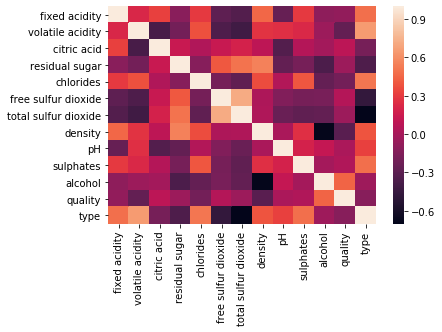

In [0]:
import seaborn as sns
corr = wines.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.show()

Import train_test_split from sklearn.model_selection

In [0]:
from sklearn.model_selection import train_test_split

# Specify the data 
X=wines.iloc[:,0:11]

# Specify the target labels and flatten the array 
y=np.ravel(wines.type)

# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Standardize The Data



Standardization is a way to deal with these values that lie so far apart. The scikit-learn package offers you a great and quick way of getting your data standardized: import the StandardScaler module from sklearn.preprocessing and you’re ready to scale your train and test data!

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [0]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [0]:
model.get_config()
model.summary()
# List all weight tensors 
model.get_weights()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.29893574,  0.1344598 ,  0.13479418, -0.4117048 ,  0.4178658 ,
          0.2751214 ,  0.3895148 ,  0.40468204, -0.04536381, -0.05943763,
          0.32893908,  0.39087683],
        [-0.1891394 ,  0.42445546,  0.3721552 , -0.42325377, -0.09202951,
         -0.26147997, -0.38362914,  0.4144168 ,  0.29331714, -0.31598642,
          0.2991094 , -0.26264733],
        [ 0.10789913, -0.33662504,  0.0893181 ,  0.00627339, -0.4771455 ,
          0.29548836, -0.15524054, -0.23642784, -0.50122494,  0.37928742,
         -0.37462157,  0.22466356],
        [-0.05772769,  0.49392945, -0.24702927,  0.212722  , -0.10569903,
         -0.3369816 ,  0.2560829 ,  0.09212792,  0.41777992,  0.02467781,
         -0.38753793, -0.27090305],
        [-0.1728242 , -0.27574426, -0.04083994, -0.33382547, -0.08132309,
          0.4145326 ,  0.34165293, -0.22079664, -0.22692028,  0.49156922,
          0.30618572,  0.19295287],
        [ 0.05382645, -0.14530566,  0.38333493, -0.20723978, -0.0892342 ,
      

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
4352/4352 [==============================] - 5s 1ms/step - loss: 2.8064 - acc: 0.7705
Epoch 2/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1786 - acc: 0.9380
Epoch 3/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1447 - acc: 0.9515
Epoch 4/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1174 - acc: 0.9593
Epoch 5/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.1009 - acc: 0.9642
Epoch 6/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0926 - acc: 0.9722
Epoch 7/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0820 - acc: 0.9761
Epoch 8/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0800 - acc: 0.9768
Epoch 9/20
4352/4352 [==============================] - 5s 1ms/step - loss: 0.0814 - acc: 0.9750
Epoch 10/20
4352/4352 [======

In [0]:
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test,verbose=1)

print(score)

2145/2145 [==============================] - 0s 35us/step
[0.09105806726333306, 0.9757575757575757]
